In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
originalImage = cv.imread('PenguinOriginal.bmp',0)
noisyImage = cv.imread('PenguinNoise.bmp',0)

# Exercise 1

## Frequency Domain

Finding the FFT

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

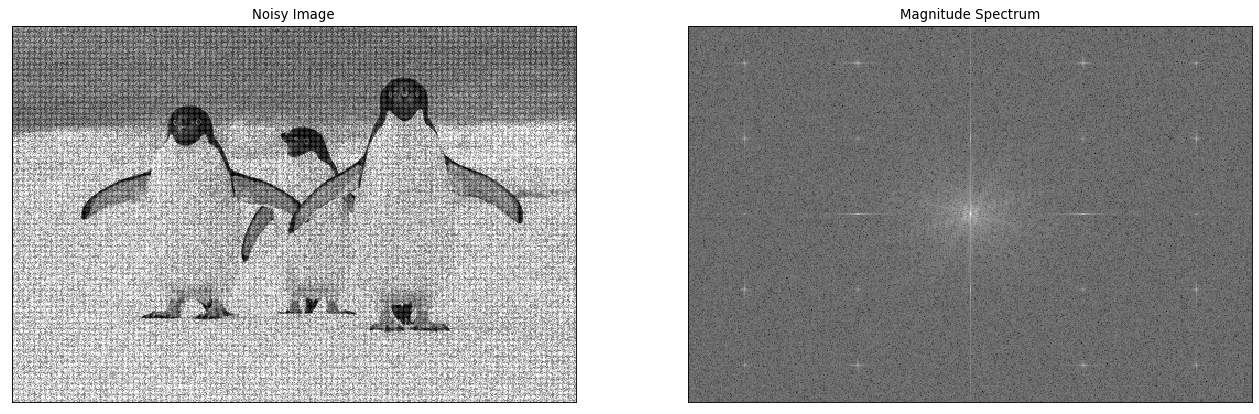

In [3]:
frequencyTransform = np.fft.fft2(noisyImage)
ftShift = np.fft.fftshift(frequencyTransform)
magnitude_spectrum = 20 * np.log(np.abs(ftShift))
fig = plt.figure(figsize = (20, 35), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.subplot(121),plt.imshow(noisyImage, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

to Find the inverse FFT, removve low frequencies by masking with a rectangular window of size 60x60. Then apply the inverse shift, before finding the inverse FFT using np.ifft2()

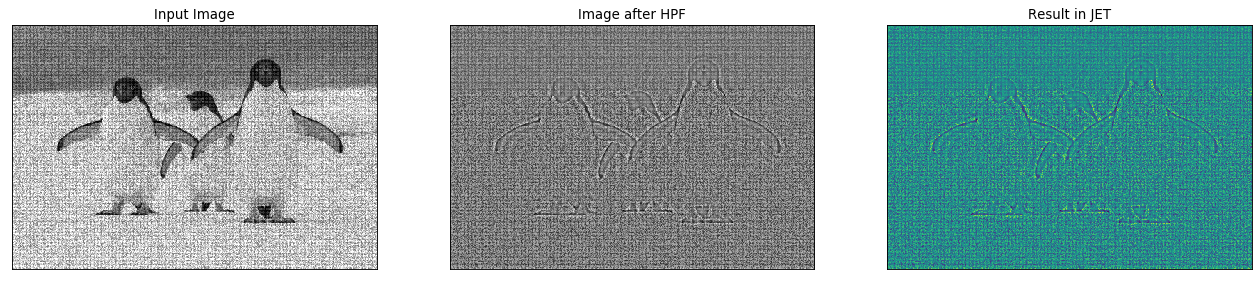

In [4]:
rows, cols = noisyImage.shape
crow, ccol = rows//2, cols//2
ftShift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(ftShift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
fig = plt.figure(figsize = (20, 35), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.subplot(131),plt.imshow(noisyImage, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

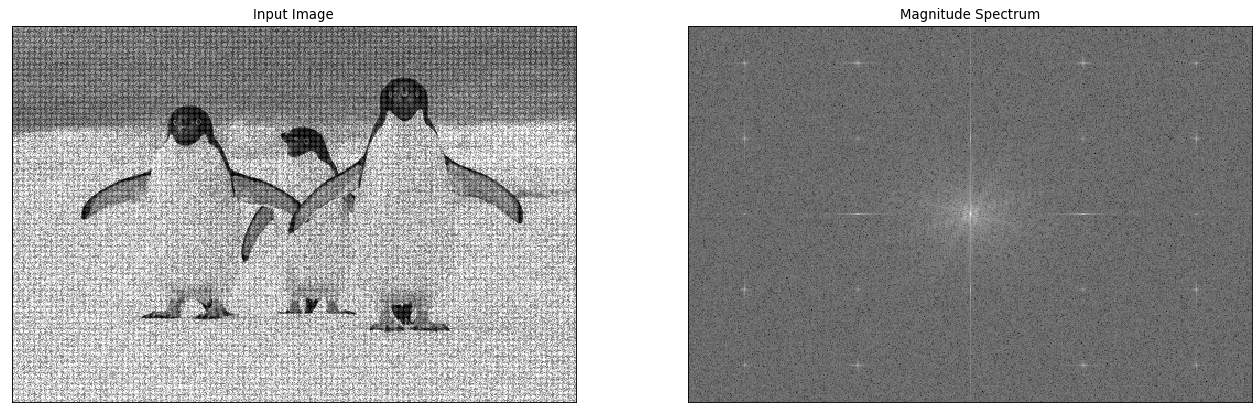

In [5]:
dft = cv.dft(np.float32(noisyImage),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fig = plt.figure(figsize = (20, 35), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.subplot(121),plt.imshow(noisyImage, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

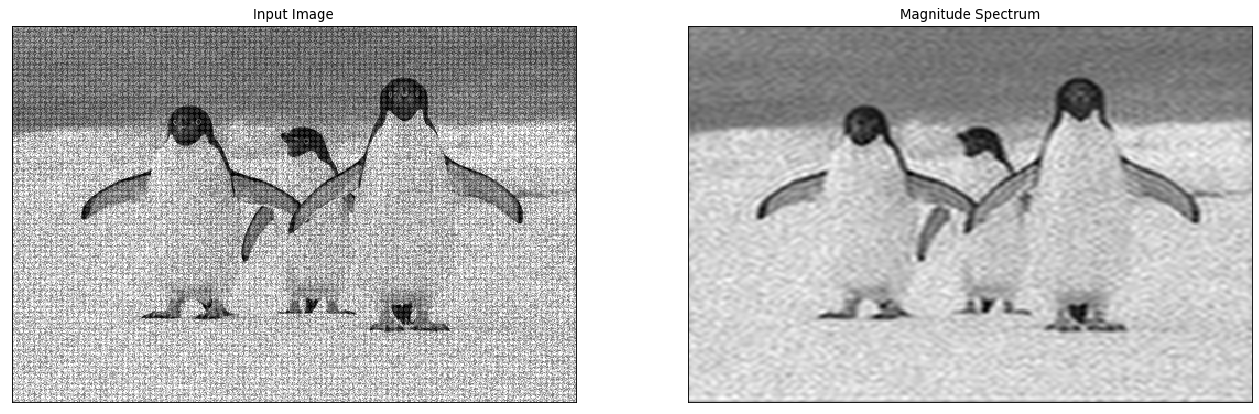

In [6]:
rows, cols = noisyImage.shape
crow, ccol = int(rows/2), int(cols/2)

maskDim = 55 #USE THIS SAM

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-maskDim:crow+maskDim, ccol-maskDim:ccol+maskDim] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
intermediateImage = cv.idft(f_ishift)
intermediateImage = cv.magnitude(intermediateImage[:,:,0],intermediateImage[:,:,1])

fig = plt.figure(figsize = (20, 35), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.subplot(121),plt.imshow(noisyImage, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(intermediateImage, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

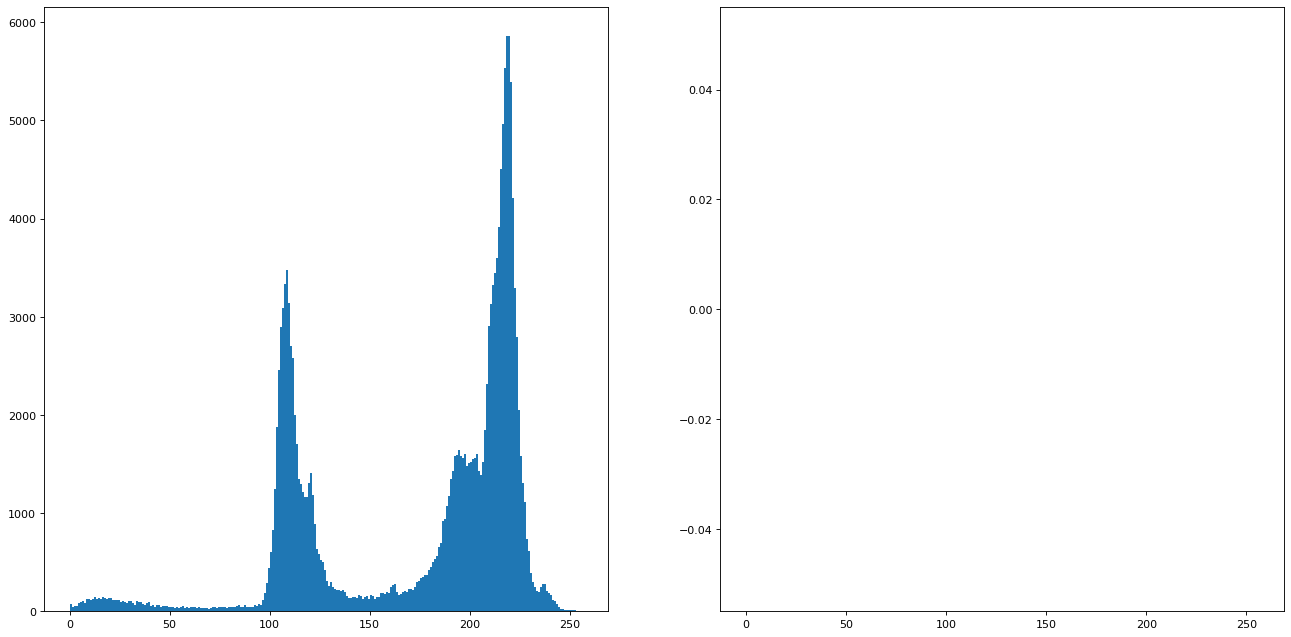

In [7]:
fig = plt.figure(figsize = (20, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.subplot(121),plt.hist(originalImage.ravel(),256,[0,256])
plt.subplot(122),plt.hist(intermediateImage.ravel(), 256, [0,256])
plt.show()

## Spatial Domain

Average Mean Squared Error

In [8]:
def amse(A, B):
    error = np.sum((A.astype("float") - B.astype("float")) ** 2)
    error /= float(A.shape[0] * A.shape[1])
    return error

Results for Exercise 1

In [9]:
print("{} {}".format(amse(originalImage, noisyImage), amse(originalImage, denoisedImage)))

NameError: name 'denoisedImage' is not defined

# Exercise 2

No Reference IQA

Results for Exercise 2